<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Gradient Boost for Kaggle

### Initializations

In [145]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
%matplotlib inline

### Load Data

In [146]:
dff = pd.read_pickle('exchange/hr_01_enriched_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
satisfactionLevel                  10000 non-null float64
yearsSinceEvaluation               10000 non-null float64
numberOfProjects                   10000 non-null int64
averageMonthlyHours                10000 non-null int64
yearsAtCompany                     10000 non-null int64
workAccident                       10000 non-null category
hasLeftCompany                     10000 non-null category
gotPromotion                       10000 non-null category
department                         10000 non-null category
salary                             10000 non-null category
projectsPerYear                    10000 non-null float64
hoursPerProject                    10000 non-null float64
satisfactionHours                  10000 non-null float64
workingHoursSinceLastEvaluation    10000 non-null float64
evaluationSatisfaction             10000 non-null float64
projectsPerWorkingHour 

In [147]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [148]:
df = pd.get_dummies(dff.drop([ 'hasLeftCompany'], axis=1)).join(dff[['hasLeftCompany']])
df.head()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,projectsPerYear,hoursPerProject,satisfactionHours,workingHoursSinceLastEvaluation,evaluationSatisfaction,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,hasLeftCompany
0,0.65,0.96,5,226,2,2.500000,1084.8,146.90,2603.52,0.6240,...,0,1,0,0,0,0,0,0,1,0
1,0.88,0.80,3,166,2,1.500000,1328.0,146.08,1593.60,0.7040,...,0,0,0,0,0,0,0,1,0,0
2,0.69,0.98,3,214,2,1.500000,1712.0,147.66,2516.64,0.6762,...,0,0,0,1,0,0,0,1,0,0
3,0.41,0.47,2,154,3,0.666667,2772.0,63.14,868.56,0.1927,...,0,0,0,1,0,0,0,1,0,1
4,0.87,0.76,5,254,2,2.500000,1219.2,220.98,2316.48,0.6612,...,0,0,0,0,0,0,0,1,0,0


In [149]:
y_train = df['hasLeftCompany'].values
y_train

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [150]:
X_train = df.drop(['hasLeftCompany'], axis=1).values
X_train

array([[ 0.65,  0.96,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.88,  0.8 ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.69,  0.98,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ..., 
       [ 0.83,  0.86,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.74,  0.56,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  1.  ]])

In [151]:
scaler = MinMaxScaler()

In [152]:
X_train_scaled = scaler.fit_transform(X_train)

In [153]:
dfy = pd.read_pickle('exchange/hr_01_enriched_test.pkl')
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 17 columns):
id                                 4999 non-null int64
satisfactionLevel                  4999 non-null float64
yearsSinceEvaluation               4999 non-null float64
numberOfProjects                   4999 non-null int64
averageMonthlyHours                4999 non-null int64
yearsAtCompany                     4999 non-null int64
workAccident                       4999 non-null category
gotPromotion                       4999 non-null category
department                         4999 non-null category
salary                             4999 non-null category
projectsPerYear                    4999 non-null float64
hoursPerProject                    4999 non-null float64
satisfactionHours                  4999 non-null float64
workingHoursSinceLastEvaluation    4999 non-null float64
evaluationSatisfaction             4999 non-null float64
projectsPerWorkingHour             4999 no

In [154]:
# Datentyp von Category in Object umwandeln
for col in dfy.select_dtypes(['category']):
    print('transforming', col)
    dfy[col] = dfy[col].astype('str')

transforming workAccident
transforming gotPromotion
transforming department
transforming salary


In [155]:
df = pd.get_dummies(dfy.drop(['id'], axis=1)).join(dfy[['id']])
df.head()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,projectsPerYear,hoursPerProject,satisfactionHours,workingHoursSinceLastEvaluation,evaluationSatisfaction,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,id
0,0.81,0.96,4,219,2,2.000000,1314.0,177.39,2522.88,0.7776,...,0,0,0,0,0,1,0,1,0,10000
1,0.86,0.84,4,246,6,0.666667,4428.0,211.56,2479.68,0.7224,...,0,0,0,0,0,0,0,1,0,10001
2,0.90,0.66,4,242,3,1.333333,2178.0,217.80,1916.64,0.5940,...,0,0,0,0,1,0,1,0,0,10002
3,0.37,0.54,2,131,3,0.666667,2358.0,48.47,848.88,0.1998,...,0,0,0,0,0,0,0,0,1,10003
4,0.52,0.96,3,271,3,1.000000,3252.0,140.92,3121.92,0.4992,...,0,0,0,0,0,1,0,0,1,10004


In [156]:
df.columns.size

30

In [157]:
ids = df['id']
ids.head()

0    10000
1    10001
2    10002
3    10003
4    10004
Name: id, dtype: int64

In [158]:
X_test = df.drop(['id'], axis=1).values
X_test

array([[ 0.81,  0.96,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.86,  0.84,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.9 ,  0.66,  4.  , ...,  1.  ,  0.  ,  0.  ],
       ..., 
       [ 0.66,  0.73,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.79,  1.  ,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.98,  0.86,  2.  , ...,  0.  ,  1.  ,  0.  ]])

In [159]:
X_test_scaled = scaler.transform(X_test)

### Tune Parameters Step by Step

#### Tuning tree-specific parameters

In [23]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_test1 = {'n_estimators':range(190,231,5)}
#clf = GradientBoostingClassifier(learning_rate=0.3, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
clf = GradientBoostingClassifier(learning_rate=0.5,random_state=10)
gsearch1 = GridSearchCV(estimator=clf,param_grid=param_test1,n_jobs=-1,iid=False, cv=10)
gsearch1.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': range(190, 231, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98130, std: 0.00504, params: {'n_estimators': 190},
  mean: 0.98150, std: 0.00446, params: {'n_estimators': 195},
  mean: 0.98190, std: 0.00401, params: {'n_estimators': 200},
  mean: 0.98160, std: 0.00482, params: {'n_estimators': 205},
  mean: 0.98180, std: 0.00489, params: {'n_estimators': 210},
  mean: 0.98190, std: 0.00448, params: {'n_estimators': 215},
  mean: 0.98160, std: 0.00432, params: {'n_estimators': 220},
  mean: 0.98100, std: 0.00450, params: {'n_estimators': 225},
  mean: 0.98110, std: 0.00409, params: {'n_estimators': 230}],
 {'n_estimators': 200},
 0.98190048190048196)

In [73]:
param_test2 = {'max_depth':range(10,41,10), 'min_samples_split':[2,5,50,250,500]}
clf=GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, random_state=10)
gsearch2 = GridSearchCV(estimator=clf, 
param_grid = param_test2,n_jobs=-1,iid=False, cv=10)
gsearch2.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(10, 41, 10), 'min_samples_split': [2, 5, 50, 250, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98320, std: 0.00360, params: {'max_depth': 10, 'min_samples_split': 2},
  mean: 0.98440, std: 0.00353, params: {'max_depth': 10, 'min_samples_split': 5},
  mean: 0.98520, std: 0.00306, params: {'max_depth': 10, 'min_samples_split': 50},
  mean: 0.98520, std: 0.00275, params: {'max_depth': 10, 'min_samples_split': 250},
  mean: 0.98230, std: 0.01042, params: {'max_depth': 10, 'min_samples_split': 500},
  mean: 0.97680, std: 0.00566, params: {'max_depth': 20, 'min_samples_split': 2},
  mean: 0.98060, std: 0.00454, params: {'max_depth': 20, 'min_samples_split': 5},
  mean: 0.98650, std: 0.00443, params: {'max_depth': 20, 'min_samples_split': 50},
  mean: 0.98600, std: 0.00296, params: {'max_depth': 20, 'min_samples_split': 250},
  mean: 0.98590, std: 0.00298, params: {'max_depth': 20, 'min_samples_split': 500},
  mean: 0.97520, std: 0.00604, params: {'max_depth': 30, 'min_samples_split': 2},
  mean: 0.97860, std: 0.00446, params: {'max_depth': 30, 'min_samples_split': 5},
  mean

In [79]:
param_test3 = {'min_samples_split':range(22,53,5), 'min_samples_leaf':range(2,6,1)}
clf=GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, random_state=10, max_depth=30)
gsearch3 = GridSearchCV(estimator=clf, param_grid = param_test3, n_jobs=-1,iid=False, cv=10)
gsearch3.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=30,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_split': range(22, 53, 5), 'min_samples_leaf': range(2, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98660, std: 0.00395, params: {'min_samples_leaf': 2, 'min_samples_split': 22},
  mean: 0.98660, std: 0.00369, params: {'min_samples_leaf': 2, 'min_samples_split': 27},
  mean: 0.98650, std: 0.00326, params: {'min_samples_leaf': 2, 'min_samples_split': 32},
  mean: 0.98640, std: 0.00408, params: {'min_samples_leaf': 2, 'min_samples_split': 37},
  mean: 0.98660, std: 0.00385, params: {'min_samples_leaf': 2, 'min_samples_split': 42},
  mean: 0.98650, std: 0.00418, params: {'min_samples_leaf': 2, 'min_samples_split': 47},
  mean: 0.98660, std: 0.00415, params: {'min_samples_leaf': 2, 'min_samples_split': 52},
  mean: 0.98640, std: 0.00355, params: {'min_samples_leaf': 3, 'min_samples_split': 22},
  mean: 0.98690, std: 0.00383, params: {'min_samples_leaf': 3, 'min_samples_split': 27},
  mean: 0.98700, std: 0.00419, params: {'min_samples_leaf': 3, 'min_samples_split': 32},
  mean: 0.98690, std: 0.00362, params: {'min_samples_leaf': 3, 'min_samples_split': 37},
  mean: 0.98690, std:

In [84]:
param_test4 = {'max_features':range(1,29,1)}
clf=GradientBoostingClassifier(learning_rate=0.5, n_estimators=200,max_depth=30, min_samples_split=32, min_samples_leaf=3, random_state=10)
gsearch4 = GridSearchCV(estimator=clf, param_grid = param_test4,n_jobs=-1,iid=False, cv=10)
gsearch4.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=30,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=32,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_features': range(1, 29)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [85]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98350, std: 0.00269, params: {'max_features': 1},
  mean: 0.98580, std: 0.00236, params: {'max_features': 2},
  mean: 0.98730, std: 0.00241, params: {'max_features': 3},
  mean: 0.98690, std: 0.00305, params: {'max_features': 4},
  mean: 0.98660, std: 0.00335, params: {'max_features': 5},
  mean: 0.98650, std: 0.00301, params: {'max_features': 6},
  mean: 0.98750, std: 0.00307, params: {'max_features': 7},
  mean: 0.98710, std: 0.00301, params: {'max_features': 8},
  mean: 0.98650, std: 0.00269, params: {'max_features': 9},
  mean: 0.98700, std: 0.00366, params: {'max_features': 10},
  mean: 0.98720, std: 0.00349, params: {'max_features': 11},
  mean: 0.98690, std: 0.00333, params: {'max_features': 12},
  mean: 0.98730, std: 0.00382, params: {'max_features': 13},
  mean: 0.98690, std: 0.00301, params: {'max_features': 14},
  mean: 0.98760, std: 0.00350, params: {'max_features': 15},
  mean: 0.98660, std: 0.00383, params: {'max_features': 16},
  mean: 0.98620, std: 0.00331, pa

In [87]:
param_test5 = {'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
clf=GradientBoostingClassifier(learning_rate=0.5, n_estimators=200,max_depth=30,min_samples_split=32, min_samples_leaf=3, max_features=15, random_state=10)
gsearch5 = GridSearchCV(estimator=clf,param_grid = param_test5,n_jobs=-1,iid=False, cv=10)
gsearch5.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=30,
              max_features=15, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=32,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.79599, std: 0.04205, params: {'subsample': 0.1},
  mean: 0.81650, std: 0.03682, params: {'subsample': 0.2},
  mean: 0.83601, std: 0.01489, params: {'subsample': 0.3},
  mean: 0.84780, std: 0.01407, params: {'subsample': 0.4},
  mean: 0.88539, std: 0.06716, params: {'subsample': 0.5},
  mean: 0.93397, std: 0.06435, params: {'subsample': 0.6},
  mean: 0.98500, std: 0.00415, params: {'subsample': 0.7},
  mean: 0.98610, std: 0.00336, params: {'subsample': 0.8},
  mean: 0.98590, std: 0.00292, params: {'subsample': 0.9},
  mean: 0.98760, std: 0.00350, params: {'subsample': 1.0}],
 {'subsample': 1.0},
 0.98760018760018775)

#### Tuning learning_rate and n_estimators

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
clf = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200,max_depth=30,min_samples_split=32, min_samples_leaf=3, max_features=15, random_state=10)

In [91]:
param_space = {'n_estimators':[200,400,800,1600], 'learning_rate':[0.5,0.25,0.125,0.0625]}

In [92]:
gs = GridSearchCV(clf, param_space, cv=10, n_jobs=-1)

In [93]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=30,
              max_features=15, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=32,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 800, 1600], 'learning_rate': [0.5, 0.25, 0.125, 0.0625]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


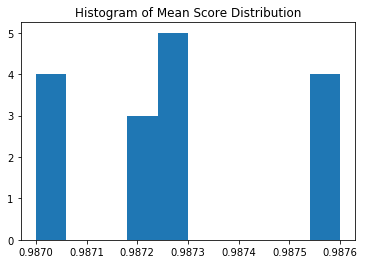

In [94]:
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [95]:
gs.best_score_

0.98760000000000003

In [96]:
gs.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

In [97]:
gs.grid_scores_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.98760, std: 0.00350, params: {'learning_rate': 0.5, 'n_estimators': 200},
 mean: 0.98760, std: 0.00350, params: {'learning_rate': 0.5, 'n_estimators': 400},
 mean: 0.98760, std: 0.00350, params: {'learning_rate': 0.5, 'n_estimators': 800},
 mean: 0.98760, std: 0.00350, params: {'learning_rate': 0.5, 'n_estimators': 1600},
 mean: 0.98700, std: 0.00316, params: {'learning_rate': 0.25, 'n_estimators': 200},
 mean: 0.98700, std: 0.00316, params: {'learning_rate': 0.25, 'n_estimators': 400},
 mean: 0.98700, std: 0.00316, params: {'learning_rate': 0.25, 'n_estimators': 800},
 mean: 0.98700, std: 0.00316, params: {'learning_rate': 0.25, 'n_estimators': 1600},
 mean: 0.98730, std: 0.00335, params: {'learning_rate': 0.125, 'n_estimators': 200},
 mean: 0.98730, std: 0.00335, params: {'learning_rate': 0.125, 'n_estimators': 400},
 mean: 0.98730, std: 0.00335, params: {'learning_rate': 0.125, 'n_estimators': 800},
 mean: 0.98730, std: 0.00335, params: {'learning_rate': 0.125, 'n_estimator

### Predicting Kaggle Data

In [161]:
clf = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200,max_depth=30,min_samples_split=32, min_samples_leaf=3, max_features=15, random_state=10)

In [162]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
scores.mean()

0.98760018760018775

In [163]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=30,
              max_features=15, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=32,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [164]:
predictions = clf.predict(X_test_scaled)
list(predictions);

In [165]:
list(ids);

In [166]:
df = pd.DataFrame(
    {'id': ids,
     'left': predictions
    })
df.head()

,id,left
0,10000,0
1,10001,1
2,10002,0
3,10003,1
4,10004,0


In [167]:
df.to_csv('kaggle/gradient_boost.csv', index=False)

**Ergebnis in Kaggle:** 99.132%